- 在多个时间点观测或测量的数据形成了时间序列

# 11.1 日期和时间数据的类型及工具

- 处理时间数据的主要模块：datetime、time、calendar

In [1]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2019, 12, 23, 14, 20, 1, 60854)

In [3]:
now.year, now.month, now.day

(2019, 12, 23)

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [6]:
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [7]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

## 11.1.1 字符串与datetime 互相转换

In [8]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [9]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [10]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [12]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [13]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [14]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [15]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [18]:
import pandas as pd
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [19]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [20]:
idx[2]

NaT

In [22]:
pd.isnull(idx)

array([False, False,  True])

# 11.2 时间序列基础

In [24]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.098105
2011-01-05    1.782523
2011-01-07    1.681758
2011-01-08    0.383767
2011-01-10    0.808687
2011-01-12   -1.568610
dtype: float64

In [25]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [26]:
ts[:2]

2011-01-02   -0.098105
2011-01-05    1.782523
dtype: float64

In [27]:
ts[::2]

2011-01-02   -0.098105
2011-01-07    1.681758
2011-01-10    0.808687
dtype: float64

In [28]:
ts + ts[::2]

2011-01-02   -0.196210
2011-01-05         NaN
2011-01-07    3.363515
2011-01-08         NaN
2011-01-10    1.617374
2011-01-12         NaN
dtype: float64

In [29]:
ts.index.dtype

dtype('<M8[ns]')

In [30]:
a = ts.index[0]
a

Timestamp('2011-01-02 00:00:00')

## 11.2.1 索引、选择、子集

In [31]:
stamp = ts.index[2]
ts[stamp]

1.681757505712152

In [32]:
ts['1/10/2011']

0.8086868162840009

In [33]:
ts['20110110']

0.8086868162840009

In [35]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.607875
2000-01-02    0.280085
2000-01-03    0.299855
2000-01-04    1.224417
2000-01-05   -1.416139
2000-01-06    1.144075
2000-01-07   -0.120746
2000-01-08    1.896611
2000-01-09   -0.607002
2000-01-10   -0.705268
2000-01-11   -0.803974
2000-01-12   -0.363899
2000-01-13   -1.204569
2000-01-14   -1.325812
2000-01-15   -0.914002
2000-01-16    0.266852
2000-01-17    0.312970
2000-01-18   -1.034853
2000-01-19   -0.571755
2000-01-20    0.819273
2000-01-21   -0.488055
2000-01-22    0.628675
2000-01-23    0.125822
2000-01-24   -1.606290
2000-01-25   -0.975518
2000-01-26   -1.158279
2000-01-27   -1.137820
2000-01-28   -1.404827
2000-01-29    0.801682
2000-01-30   -0.844616
                ...   
2002-08-28   -0.490798
2002-08-29   -0.068453
2002-08-30   -0.153268
2002-08-31   -1.609031
2002-09-01    0.780231
2002-09-02    0.120097
2002-09-03   -0.075149
2002-09-04   -1.084913
2002-09-05   -0.888349
2002-09-06    0.185251
2002-09-07   -0.330492
2002-09-08   -2.376477
2002-09-09 

In [36]:
longer_ts['2001']

2001-01-01    1.273333
2001-01-02   -0.237941
2001-01-03    1.706988
2001-01-04    0.924470
2001-01-05   -0.682130
2001-01-06   -0.844547
2001-01-07    1.534552
2001-01-08    0.478719
2001-01-09    1.513419
2001-01-10   -0.469158
2001-01-11   -0.244343
2001-01-12    1.148962
2001-01-13    0.483962
2001-01-14    0.733161
2001-01-15   -0.058933
2001-01-16    0.745874
2001-01-17   -1.167026
2001-01-18    0.671775
2001-01-19    1.401151
2001-01-20   -2.302935
2001-01-21    1.763629
2001-01-22   -0.733874
2001-01-23    0.165344
2001-01-24    1.330091
2001-01-25    0.145178
2001-01-26   -1.003853
2001-01-27    0.087239
2001-01-28    1.703170
2001-01-29    0.305439
2001-01-30   -0.822697
                ...   
2001-12-02    0.616212
2001-12-03   -1.415160
2001-12-04    0.478700
2001-12-05   -1.109636
2001-12-06   -0.247713
2001-12-07    0.334256
2001-12-08   -0.903928
2001-12-09   -0.985738
2001-12-10    0.153120
2001-12-11   -0.078919
2001-12-12   -0.687129
2001-12-13    1.165540
2001-12-14 

In [37]:
longer_ts['2001-05']

2001-05-01    2.769512
2001-05-02    0.880820
2001-05-03    1.124796
2001-05-04    0.871636
2001-05-05    1.609536
2001-05-06   -0.160643
2001-05-07   -0.741322
2001-05-08    0.675677
2001-05-09   -0.511809
2001-05-10   -0.115027
2001-05-11    1.213670
2001-05-12    0.113409
2001-05-13   -0.808904
2001-05-14    0.196350
2001-05-15   -0.014443
2001-05-16    2.274842
2001-05-17    0.106137
2001-05-18   -0.817298
2001-05-19   -2.062092
2001-05-20   -0.229189
2001-05-21    0.387175
2001-05-22    1.848564
2001-05-23    0.716349
2001-05-24   -0.869787
2001-05-25   -1.451173
2001-05-26   -1.685764
2001-05-27   -0.032795
2001-05-28   -0.870026
2001-05-29    2.652108
2001-05-30    0.700763
2001-05-31   -0.236144
Freq: D, dtype: float64

In [38]:
ts

2011-01-02   -0.098105
2011-01-05    1.782523
2011-01-07    1.681758
2011-01-08    0.383767
2011-01-10    0.808687
2011-01-12   -1.568610
dtype: float64

In [40]:
ts[datetime(2011,1,7):]

2011-01-07    1.681758
2011-01-08    0.383767
2011-01-10    0.808687
2011-01-12   -1.568610
dtype: float64

In [41]:
ts['1/6/2011':'1/11/2011']

2011-01-07    1.681758
2011-01-08    0.383767
2011-01-10    0.808687
dtype: float64

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
from datetime import timedelta

In [2]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates, columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.779362,2.629903,-0.704279,0.685965
2000-01-12,-0.280440,1.195872,0.534941,1.845921
2000-01-19,-0.726931,-2.690896,-0.370204,0.028641
2000-01-26,0.612527,-0.871239,-1.864080,0.541235
2000-02-02,0.762041,-1.416554,-0.361560,0.141024
2000-02-09,-1.072505,0.447912,0.630408,0.899326
2000-02-16,-0.998913,0.477345,0.027231,0.328263
2000-02-23,-1.015542,0.839324,0.168419,0.018548
2000-03-01,0.905899,1.189928,-1.532722,-0.658318
2000-03-08,0.953080,-0.233386,0.715225,-1.610152


In [3]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.622263,0.096719,1.087355,-0.145748
2001-05-09,-0.425488,-1.337146,1.150597,0.162057
2001-05-16,-0.074424,0.517470,-0.260140,-0.456172
2001-05-23,-1.429675,1.966623,1.729926,0.256080
2001-05-30,-0.121441,0.009753,-1.391554,-0.172654


## 11.2.2 含有重复索引的时间序列

In [4]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [5]:
dup_ts.index.is_unique

False

In [8]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [9]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

# 11.3 日期范围、频率和移位

In [11]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.814233
2011-01-05   -1.651405
2011-01-07   -0.911051
2011-01-08    0.111463
2011-01-10    2.472571
2011-01-12   -1.212210
dtype: float64

In [13]:
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

## 11.3.1 生成日期范围

In [14]:
index = pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [15]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [16]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [17]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 11.3.2 频率和日期偏置

In [18]:
from pandas.tseries.offsets import Hour,Minute
hour = Hour()
hour

<Hour>

In [20]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [21]:
pd.date_range('2000-01-01', '2000-01-01 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [23]:
# 多个偏置可以通过加法联合
Hour(2) + Minute(30)

<150 * Minutes>

In [25]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

### 11.3.2.1 月中某星期的日期

In [28]:
rng = pd.date_range('2019-01-01', '2019-12-31', freq='WOM-4FRI')
list(rng)

[Timestamp('2019-01-25 00:00:00', freq='WOM-4FRI'),
 Timestamp('2019-02-22 00:00:00', freq='WOM-4FRI'),
 Timestamp('2019-03-22 00:00:00', freq='WOM-4FRI'),
 Timestamp('2019-04-26 00:00:00', freq='WOM-4FRI'),
 Timestamp('2019-05-24 00:00:00', freq='WOM-4FRI'),
 Timestamp('2019-06-28 00:00:00', freq='WOM-4FRI'),
 Timestamp('2019-07-26 00:00:00', freq='WOM-4FRI'),
 Timestamp('2019-08-23 00:00:00', freq='WOM-4FRI'),
 Timestamp('2019-09-27 00:00:00', freq='WOM-4FRI'),
 Timestamp('2019-10-25 00:00:00', freq='WOM-4FRI'),
 Timestamp('2019-11-22 00:00:00', freq='WOM-4FRI'),
 Timestamp('2019-12-27 00:00:00', freq='WOM-4FRI')]

## 11.3.3 移位（前向和后向）日期

In [33]:
p = pd.date_range('1/1/2000', periods=4, freq='M')
ts = pd.Series(np.random.randn(4), index=p)
ts

2000-01-31    1.306007
2000-02-29   -1.633431
2000-03-31   -1.025533
2000-04-30   -0.876013
Freq: M, dtype: float64

In [34]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    1.306007
2000-04-30   -1.633431
Freq: M, dtype: float64

In [35]:
ts.shift(-2)

2000-01-31   -1.025533
2000-02-29   -0.876013
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [37]:
ts

2000-01-31    1.306007
2000-02-29   -1.633431
2000-03-31   -1.025533
2000-04-30   -0.876013
Freq: M, dtype: float64

In [38]:
ts/ts.shift(1)-1

2000-01-31         NaN
2000-02-29   -2.250707
2000-03-31   -0.372160
2000-04-30   -0.145798
Freq: M, dtype: float64

In [39]:
ts

2000-01-31    1.306007
2000-02-29   -1.633431
2000-03-31   -1.025533
2000-04-30   -0.876013
Freq: M, dtype: float64

In [40]:
ts.shift(2, freq='M')

2000-03-31    1.306007
2000-04-30   -1.633431
2000-05-31   -1.025533
2000-06-30   -0.876013
Freq: M, dtype: float64

In [41]:
ts.shift(3, freq='D')

2000-02-03    1.306007
2000-03-03   -1.633431
2000-04-03   -1.025533
2000-05-03   -0.876013
dtype: float64

In [42]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    1.306007
2000-02-29 01:30:00   -1.633431
2000-03-31 01:30:00   -1.025533
2000-04-30 01:30:00   -0.876013
Freq: M, dtype: float64

### 11.3.3.1 使用偏置进行移位日期

In [45]:
# pandas 日期偏置可以使用datetime或Timestamp对象完成
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [46]:
now

datetime.datetime(2011, 11, 17, 0, 0)

In [47]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [48]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [49]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [51]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [53]:
# 将移位方法与groupby一起使用是日期偏置的一种创造性用法
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    0.132703
2000-01-19    1.731049
2000-01-23    0.982333
2000-01-27    1.820737
2000-01-31   -0.482162
2000-02-04   -0.381695
2000-02-08   -1.319129
2000-02-12   -0.106490
2000-02-16    1.505731
2000-02-20   -1.256100
2000-02-24    0.161611
2000-02-28    0.110377
2000-03-03   -0.322806
2000-03-07    0.848669
2000-03-11   -0.309165
2000-03-15    0.341331
2000-03-19   -0.866128
2000-03-23   -1.027995
2000-03-27    1.800468
2000-03-31    0.330340
Freq: 4D, dtype: float64

In [55]:
ts.resample('M').mean()

2000-01-31    0.836932
2000-02-29   -0.183671
2000-03-31    0.099339
Freq: M, dtype: float64

# 11.4 时区处理

In [56]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [58]:
tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

## 11.4.1 时区的本地化和转换

In [60]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.907841
2012-03-10 09:30:00    0.725801
2012-03-11 09:30:00    1.892998
2012-03-12 09:30:00    2.294577
2012-03-13 09:30:00   -0.079019
2012-03-14 09:30:00    0.180087
Freq: D, dtype: float64

In [61]:
print(ts.index.tz)

None


In [63]:
# 日期范围可以通过时区集合来生成
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [64]:
# 使用tz_localize方法可以从简单时区转换到本地化时区
ts

2012-03-09 09:30:00   -0.907841
2012-03-10 09:30:00    0.725801
2012-03-11 09:30:00    1.892998
2012-03-12 09:30:00    2.294577
2012-03-13 09:30:00   -0.079019
2012-03-14 09:30:00    0.180087
Freq: D, dtype: float64

In [66]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.907841
2012-03-10 09:30:00+00:00    0.725801
2012-03-11 09:30:00+00:00    1.892998
2012-03-12 09:30:00+00:00    2.294577
2012-03-13 09:30:00+00:00   -0.079019
2012-03-14 09:30:00+00:00    0.180087
Freq: D, dtype: float64

In [67]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [68]:
# 可通过tz_convert将其转换为另一个时区
ts_utc.tz_convert('America/New_York')

2012-03-09 04:30:00-05:00   -0.907841
2012-03-10 04:30:00-05:00    0.725801
2012-03-11 05:30:00-04:00    1.892998
2012-03-12 05:30:00-04:00    2.294577
2012-03-13 05:30:00-04:00   -0.079019
2012-03-14 05:30:00-04:00    0.180087
Freq: D, dtype: float64

In [70]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.907841
2012-03-10 14:30:00+00:00    0.725801
2012-03-11 13:30:00+00:00    1.892998
2012-03-12 13:30:00+00:00    2.294577
2012-03-13 13:30:00+00:00   -0.079019
2012-03-14 13:30:00+00:00    0.180087
Freq: D, dtype: float64

In [71]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.907841
2012-03-10 15:30:00+01:00    0.725801
2012-03-11 14:30:00+01:00    1.892998
2012-03-12 14:30:00+01:00    2.294577
2012-03-13 14:30:00+01:00   -0.079019
2012-03-14 14:30:00+01:00    0.180087
Freq: D, dtype: float64

In [72]:
ts

2012-03-09 09:30:00   -0.907841
2012-03-10 09:30:00    0.725801
2012-03-11 09:30:00    1.892998
2012-03-12 09:30:00    2.294577
2012-03-13 09:30:00   -0.079019
2012-03-14 09:30:00    0.180087
Freq: D, dtype: float64

In [73]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

## 11.4.2 时区感知时间戳对象的操作

In [74]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp

Timestamp('2011-03-12 04:00:00')

In [76]:
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

In [77]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [78]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [79]:
stamp_utc.value

1299902400000000000

In [80]:
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [81]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [83]:
# 构建从DST进行转换前的90分钟
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [84]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

## 11.4.3 不同时区间的操作

In [86]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.796324
2012-03-08 09:30:00   -0.566247
2012-03-09 09:30:00   -1.295945
2012-03-12 09:30:00    0.776013
2012-03-13 09:30:00   -1.007263
2012-03-14 09:30:00    1.253915
2012-03-15 09:30:00    0.659480
2012-03-16 09:30:00   -0.633308
2012-03-19 09:30:00   -0.220053
2012-03-20 09:30:00   -2.088082
Freq: B, dtype: float64

In [88]:
ts1 = ts[:7].tz_localize('Europe/London')
ts1

2012-03-07 09:30:00+00:00   -0.796324
2012-03-08 09:30:00+00:00   -0.566247
2012-03-09 09:30:00+00:00   -1.295945
2012-03-12 09:30:00+00:00    0.776013
2012-03-13 09:30:00+00:00   -1.007263
2012-03-14 09:30:00+00:00    1.253915
2012-03-15 09:30:00+00:00    0.659480
Freq: B, dtype: float64

In [89]:
ts2 = ts[:7].tz_localize('Europe/Moscow')
ts2

2012-03-07 09:30:00+04:00   -0.796324
2012-03-08 09:30:00+04:00   -0.566247
2012-03-09 09:30:00+04:00   -1.295945
2012-03-12 09:30:00+04:00    0.776013
2012-03-13 09:30:00+04:00   -1.007263
2012-03-14 09:30:00+04:00    1.253915
2012-03-15 09:30:00+04:00    0.659480
Freq: B, dtype: float64

In [90]:
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 05:30:00+00:00', '2012-03-07 09:30:00+00:00',
               '2012-03-08 05:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 05:30:00+00:00', '2012-03-09 09:30:00+00:00',
               '2012-03-12 05:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 05:30:00+00:00', '2012-03-13 09:30:00+00:00',
               '2012-03-14 05:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 05:30:00+00:00', '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# 11.5 时间区间与区间算术

In [94]:
p = pd.Period(2019, freq='A-DEC')
p

Period('2019', 'A-DEC')

In [95]:
p + 5

Period('2024', 'A-DEC')

In [96]:
p - 2

Period('2017', 'A-DEC')

In [97]:
pd.Period('2020', freq='A-DEC') - p

1

In [99]:
# 使用period_range函数可以构造区间序列
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')
rng


PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [100]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.875942
2000-02   -1.168923
2000-03   -0.985168
2000-04    0.998756
2000-05   -0.627003
2000-06    0.042879
Freq: M, dtype: float64

In [101]:
# 字符串组，也可使用PeriodIndex类
values = ['200103', '200202', '200301']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2003Q1', '2002Q1', '2001Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

## 11.5.1 区间频率转换

In [102]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [103]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [104]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [105]:
p = pd.Period('2007', freq='A-JUN')
p

Period('2007', 'A-JUN')

In [106]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [107]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [109]:
p = pd.Period('Aug-2007', 'M')
p

Period('2007-08', 'M')

In [111]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [112]:
# 完整的PeriodIndex对象或时间序列可以按照相同的语义进行转换
rng = pd.period_range('2006', '2009', freq='A-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009'], dtype='period[A-DEC]', freq='A-DEC')

In [113]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.054727
2007    0.383888
2008   -0.456877
2009    0.603080
Freq: A-DEC, dtype: float64

In [114]:
ts.asfreq('M', how='start')

2006-01    0.054727
2007-01    0.383888
2008-01   -0.456877
2009-01    0.603080
Freq: M, dtype: float64

In [117]:
ts.asfreq('B', how='end')

2006-12-29    0.054727
2007-12-31    0.383888
2008-12-31   -0.456877
2009-12-31    0.603080
Freq: B, dtype: float64

## 11.5.2 季度区间频率

In [118]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [119]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [120]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [122]:
# 简单的区间算术：获取在季度倒数第二个工作日下午4点的时间戳
p4pm = (p.asfreq('B', 'e')-1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [123]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [124]:
# 可以使用period_range生成季度序列
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [126]:
new_rng = (rng.asfreq('B', 'e')-1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

## 11.5.3 将时间戳转换为区间（以及逆转换）

In [127]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [129]:
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    1.501738
2000-02-29   -0.801390
2000-03-31   -0.746838
Freq: M, dtype: float64

In [130]:
pts = ts.to_period()
pts

2000-01    1.501738
2000-02   -0.801390
2000-03   -0.746838
Freq: M, dtype: float64

In [134]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
rng

DatetimeIndex(['2000-01-29', '2000-01-30', '2000-01-31', '2000-02-01',
               '2000-02-02', '2000-02-03'],
              dtype='datetime64[ns]', freq='D')

In [136]:
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -1.336344
2000-01-30    0.396932
2000-01-31    0.329523
2000-02-01   -0.057318
2000-02-02   -0.535972
2000-02-03   -0.233542
Freq: D, dtype: float64

In [137]:
ts2.to_period('M')

2000-01   -1.336344
2000-01    0.396932
2000-01    0.329523
2000-02   -0.057318
2000-02   -0.535972
2000-02   -0.233542
Freq: M, dtype: float64

In [138]:
# 使用to_stamp可以将区间再转换为时间戳
pts = ts2.to_period()
pts

2000-01-29   -1.336344
2000-01-30    0.396932
2000-01-31    0.329523
2000-02-01   -0.057318
2000-02-02   -0.535972
2000-02-03   -0.233542
Freq: D, dtype: float64

In [140]:
pts.to_timestamp(how='end')

2000-01-29   -1.336344
2000-01-30    0.396932
2000-01-31    0.329523
2000-02-01   -0.057318
2000-02-02   -0.535972
2000-02-03   -0.233542
Freq: D, dtype: float64

## 11.5.4 从数组生成PeriodIndex

In [141]:
data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [150]:
data.year

0       1959.0
1       1959.0
2       1959.0
3       1959.0
4       1960.0
5       1960.0
6       1960.0
7       1960.0
8       1961.0
9       1961.0
10      1961.0
11      1961.0
12      1962.0
13      1962.0
14      1962.0
15      1962.0
16      1963.0
17      1963.0
18      1963.0
19      1963.0
20      1964.0
21      1964.0
22      1964.0
23      1964.0
24      1965.0
25      1965.0
26      1965.0
27      1965.0
28      1966.0
29      1966.0
         ...  
9870       NaN
9871       NaN
9872       NaN
9873       NaN
9874       NaN
9875       NaN
9876       NaN
9877       NaN
9878       NaN
9879       NaN
9880       NaN
9881       NaN
9882       NaN
9883       NaN
9884       NaN
9885       NaN
9886       NaN
9887       NaN
9888       NaN
9889       NaN
9890       NaN
9891       NaN
9892       NaN
9893       NaN
9894       NaN
9895       NaN
9896       NaN
9897       NaN
9898       NaN
9899       NaN
Name: year, Length: 9900, dtype: float64

In [146]:
data.quarter

0       1.0
1       2.0
2       3.0
3       4.0
4       1.0
5       2.0
6       3.0
7       4.0
8       1.0
9       2.0
10      3.0
11      4.0
12      1.0
13      2.0
14      3.0
15      4.0
16      1.0
17      2.0
18      3.0
19      4.0
20      1.0
21      2.0
22      3.0
23      4.0
24      1.0
25      2.0
26      3.0
27      4.0
28      1.0
29      2.0
       ... 
9870    NaN
9871    NaN
9872    NaN
9873    NaN
9874    NaN
9875    NaN
9876    NaN
9877    NaN
9878    NaN
9879    NaN
9880    NaN
9881    NaN
9882    NaN
9883    NaN
9884    NaN
9885    NaN
9886    NaN
9887    NaN
9888    NaN
9889    NaN
9890    NaN
9891    NaN
9892    NaN
9893    NaN
9894    NaN
9895    NaN
9896    NaN
9897    NaN
9898    NaN
9899    NaN
Name: quarter, Length: 9900, dtype: float64

In [148]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

D:\Users\ttren\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexes\period.py:1208: RuntimeWarning: invalid value encountered in double_scalars
  y, m = _quarter_to_myear(y, q, freq)


ValueError: cannot convert float NaN to integer

# 11.6 重新采样与频率转换

In [151]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -1.246044
2000-01-02    0.008314
2000-01-03   -1.239744
2000-01-04    0.081936
2000-01-05    0.904948
2000-01-06    0.512093
2000-01-07    1.671387
2000-01-08    0.467083
2000-01-09   -1.728567
2000-01-10   -0.048726
2000-01-11   -1.220853
2000-01-12   -0.311723
2000-01-13   -0.516518
2000-01-14    0.059467
2000-01-15   -0.192248
2000-01-16   -0.036235
2000-01-17    1.130042
2000-01-18   -0.296217
2000-01-19    0.105009
2000-01-20   -0.497522
2000-01-21   -0.026742
2000-01-22   -1.092752
2000-01-23    1.091546
2000-01-24   -0.469938
2000-01-25    0.144753
2000-01-26    0.347683
2000-01-27    0.389579
2000-01-28    0.716379
2000-01-29   -0.619073
2000-01-30    2.004910
                ...   
2000-03-11   -2.511441
2000-03-12    1.804352
2000-03-13    0.835061
2000-03-14   -0.321440
2000-03-15   -0.042849
2000-03-16   -0.296961
2000-03-17   -0.824828
2000-03-18    0.862897
2000-03-19    0.457105
2000-03-20   -1.104782
2000-03-21   -2.104431
2000-03-22   -0.610701
2000-03-23 

In [152]:
ts.resample('M').mean()

2000-01-31   -0.021314
2000-02-29    0.024939
2000-03-31   -0.205917
2000-04-30    0.290609
Freq: M, dtype: float64

In [153]:
ts.resample('M', kind='period').mean()

2000-01   -0.021314
2000-02    0.024939
2000-03   -0.205917
2000-04    0.290609
Freq: M, dtype: float64

## 11.6.1 向下采样

In [155]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [156]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [157]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [159]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [160]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

### 11.6.1.1 开端-峰值-谷值-结束（OHLC）重新采样

In [161]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## 11.6.2 向上采样与插值

In [163]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.167554,1.705541,-0.306146,0.292399
2000-01-12,0.812408,0.064305,0.457611,-2.793449


In [164]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.167554,1.705541,-0.306146,0.292399
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.812408,0.064305,0.457611,-2.793449


In [165]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.167554,1.705541,-0.306146,0.292399
2000-01-06,0.167554,1.705541,-0.306146,0.292399
2000-01-07,0.167554,1.705541,-0.306146,0.292399
2000-01-08,0.167554,1.705541,-0.306146,0.292399
2000-01-09,0.167554,1.705541,-0.306146,0.292399
2000-01-10,0.167554,1.705541,-0.306146,0.292399
2000-01-11,0.167554,1.705541,-0.306146,0.292399
2000-01-12,0.812408,0.064305,0.457611,-2.793449


In [166]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.167554,1.705541,-0.306146,0.292399
2000-01-06,0.167554,1.705541,-0.306146,0.292399
2000-01-07,0.167554,1.705541,-0.306146,0.292399
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.812408,0.064305,0.457611,-2.793449


In [167]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,0.167554,1.705541,-0.306146,0.292399
2000-01-13,0.812408,0.064305,0.457611,-2.793449


## 11.6.3 使用区间进行重新采样

In [168]:
frame = pd.DataFrame(np.random.randn(24,4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]A

,Colorado,Texas,New York,Ohio
2000-01,0.237770,-0.781146,-1.276174,0.280746
2000-02,-0.292157,0.357278,1.930577,0.562477
2000-03,-0.497947,0.466862,-0.149137,-0.421243
2000-04,-2.572603,-0.070057,-0.156930,-0.568377
2000-05,-0.560451,0.095686,1.456346,0.689898


In [169]:
frame

,Colorado,Texas,New York,Ohio
2000-01,0.237770,-0.781146,-1.276174,0.280746
2000-02,-0.292157,0.357278,1.930577,0.562477
2000-03,-0.497947,0.466862,-0.149137,-0.421243
2000-04,-2.572603,-0.070057,-0.156930,-0.568377
2000-05,-0.560451,0.095686,1.456346,0.689898
2000-06,0.133421,-0.597196,0.365219,1.346362
2000-07,0.207473,-0.585580,-0.161043,0.338054
2000-08,-0.220930,1.235103,1.008924,0.368318
2000-09,-0.669559,0.712081,-0.942862,0.591665
2000-10,-0.582277,-0.276218,0.111292,0.621154


In [171]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.428663,-0.210982,0.106319,0.367644
2001,-0.452692,0.141730,-0.148600,0.035542


In [172]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.428663,-0.210982,0.106319,0.367644
2000Q2,-0.428663,-0.210982,0.106319,0.367644
2000Q3,-0.428663,-0.210982,0.106319,0.367644
2000Q4,-0.428663,-0.210982,0.106319,0.367644
2001Q1,-0.452692,0.141730,-0.148600,0.035542
2001Q2,-0.452692,0.141730,-0.148600,0.035542
2001Q3,-0.452692,0.141730,-0.148600,0.035542
2001Q4,-0.452692,0.141730,-0.148600,0.035542


In [174]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.428663,-0.210982,0.106319,0.367644
2001Q1,-0.428663,-0.210982,0.106319,0.367644
2001Q2,-0.428663,-0.210982,0.106319,0.367644
2001Q3,-0.428663,-0.210982,0.106319,0.367644
2001Q4,-0.452692,0.141730,-0.148600,0.035542


# 11.7 移动窗口函数

In [176]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.AAPL.plot()

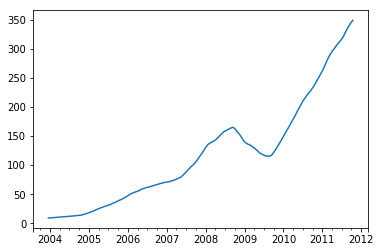

In [177]:
close_px.AAPL.rolling(250).mean().plot()

In [178]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

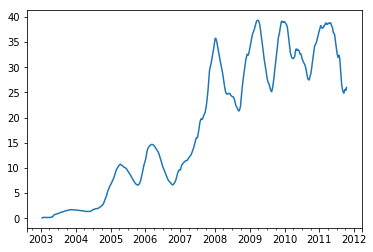

In [179]:
appl_std250.plot()

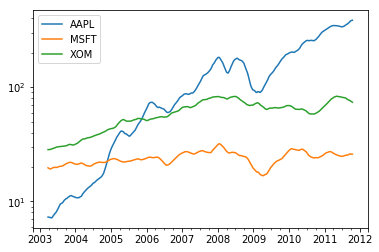

In [181]:
expanding_mean = appl_std250.expanding().mean()
close_px.rolling(60).mean().plot(logy=True)

In [182]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
2003-01-10,7.387143,21.558571,29.238571
2003-01-13,7.378750,21.633750,29.197500
2003-01-14,7.370000,21.717778,29.194444
2003-01-15,7.355000,21.757000,29.152000


## 11.7.1 指数加权函数 